In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from statsmodels import api as sm
from statsmodels.formula import api as smf

In [2]:
sweep_df = pd.read_csv('../figures/search_PB20200622.csv', index_col=0)

In [3]:
sweep_df.head(10)

,lr,betas,filters,pool_size,fully_connected,drop,train_loss,validation_loss,loss_diff,train_precision,validation_precision,train_recall,validation_recall,train_f1_score,validation_f1_score,epoch_time
0,0.001,"(0.9, 0.99)",100,25,100,0.3,2.437228,2.491107,0.053879,0.443843,0.380080,0.435725,0.380125,0.425970,0.369335,6.045839
1,0.001,"(0.9, 0.99)",100,25,100,0.4,2.472856,2.506963,0.034108,0.399582,0.356049,0.399319,0.364938,0.381167,0.347177,5.994172
2,0.001,"(0.9, 0.99)",100,25,100,0.5,2.492996,2.518408,0.025413,0.388352,0.357360,0.379000,0.353000,0.361170,0.334131,6.060338
3,0.001,"(0.9, 0.99)",100,100,100,0.3,2.452892,2.483354,0.030462,0.418084,0.384307,0.419931,0.387750,0.409095,0.377713,6.070609
4,0.001,"(0.9, 0.99)",100,100,100,0.4,2.471313,2.491628,0.020315,0.394653,0.374598,0.400906,0.380750,0.387757,0.367534,6.081499
5,0.001,"(0.9, 0.99)",100,100,100,0.5,2.497928,2.512721,0.014793,0.367363,0.357173,0.374181,0.358563,0.354455,0.337902,6.056457
6,0.001,"(0.9, 0.99)",75,25,100,0.3,2.466388,2.513346,0.046959,0.408693,0.360961,0.406137,0.358313,0.395324,0.347093,5.575387
7,0.001,"(0.9, 0.99)",75,25,100,0.4,2.480087,2.514027,0.033939,0.397602,0.355657,0.391931,0.357063,0.377063,0.341597,5.565593
8,0.001,"(0.9, 0.99)",75,25,100,0.5,2.507971,2.530697,0.022726,0.370132,0.340681,0.363812,0.339750,0.345995,0.320510,5.470231
9,0.001,"(0.9, 0.99)",75,100,100,0.3,2.476047,2.504830,0.028783,0.397021,0.363419,0.396406,0.365938,0.384447,0.354001,5.447208


In [4]:
mask_top50 = sweep_df.validation_f1_score.rank(ascending=False) <= 50.0
sweep_df[mask_top50].sort_values('validation_f1_score', ascending=False)

,lr,betas,filters,pool_size,fully_connected,drop,train_loss,validation_loss,loss_diff,train_precision,validation_precision,train_recall,validation_recall,train_f1_score,validation_f1_score,epoch_time
3,0.001,"(0.9, 0.99)",100,100,100,0.3,2.452892,2.483354,0.030462,0.418084,0.384307,0.419931,0.387750,0.409095,0.377713,6.070609
0,0.001,"(0.9, 0.99)",100,25,100,0.3,2.437228,2.491107,0.053879,0.443843,0.380080,0.435725,0.380125,0.425970,0.369335,6.045839
4,0.001,"(0.9, 0.99)",100,100,100,0.4,2.471313,2.491628,0.020315,0.394653,0.374598,0.400906,0.380750,0.387757,0.367534,6.081499
9,0.001,"(0.9, 0.99)",75,100,100,0.3,2.476047,2.504830,0.028783,0.397021,0.363419,0.396406,0.365938,0.384447,0.354001,5.447208
1,0.001,"(0.9, 0.99)",100,25,100,0.4,2.472856,2.506963,0.034108,0.399582,0.356049,0.399319,0.364938,0.381167,0.347177,5.994172
6,0.001,"(0.9, 0.99)",75,25,100,0.3,2.466388,2.513346,0.046959,0.408693,0.360961,0.406137,0.358313,0.395324,0.347093,5.575387
10,0.001,"(0.9, 0.99)",75,100,100,0.4,2.492408,2.509966,0.017559,0.374385,0.355080,0.380063,0.360000,0.362843,0.342117,5.548280
7,0.001,"(0.9, 0.99)",75,25,100,0.4,2.480087,2.514027,0.033939,0.397602,0.355657,0.391931,0.357063,0.377063,0.341597,5.565593
5,0.001,"(0.9, 0.99)",100,100,100,0.5,2.497928,2.512721,0.014793,0.367363,0.357173,0.374181,0.358563,0.354455,0.337902,6.056457
2,0.001,"(0.9, 0.99)",100,25,100,0.5,2.492996,2.518408,0.025413,0.388352,0.357360,0.379000,0.353000,0.361170,0.334131,6.060338


In [5]:
f1_rank = sweep_df.validation_f1_score.rank(ascending=False)
diff_rank = sweep_df.loss_diff.rank(ascending=True)

corank = (f1_rank + diff_rank) / 2
sweep_df['corank'] = corank

sweep_df.sort_values('corank', ascending=True).head(10)

,lr,betas,filters,pool_size,fully_connected,drop,train_loss,validation_loss,loss_diff,train_precision,validation_precision,train_recall,validation_recall,train_f1_score,validation_f1_score,epoch_time,corank
4,0.001,"(0.9, 0.99)",100,100,100,0.4,2.471313,2.491628,0.020315,0.394653,0.374598,0.400906,0.380750,0.387757,0.367534,6.081499,13.0
10,0.001,"(0.9, 0.99)",75,100,100,0.4,2.492408,2.509966,0.017559,0.374385,0.355080,0.380063,0.360000,0.362843,0.342117,5.548280,13.5
5,0.001,"(0.9, 0.99)",100,100,100,0.5,2.497928,2.512721,0.014793,0.367363,0.357173,0.374181,0.358563,0.354455,0.337902,6.056457,14.0
11,0.001,"(0.9, 0.99)",75,100,100,0.5,2.516135,2.529552,0.013417,0.330872,0.312820,0.356119,0.341438,0.331723,0.316502,5.512124,14.0
14,0.001,"(0.9, 0.99)",50,25,100,0.5,2.545570,2.557098,0.011529,0.331012,0.322815,0.325087,0.312812,0.309100,0.295478,5.978700,14.5
3,0.001,"(0.9, 0.99)",100,100,100,0.3,2.452892,2.483354,0.030462,0.418084,0.384307,0.419931,0.387750,0.409095,0.377713,6.070609,15.5
16,0.001,"(0.9, 0.99)",50,100,100,0.4,2.522953,2.536579,0.013626,0.353963,0.347708,0.349081,0.333937,0.329160,0.313331,5.920881,16.5
9,0.001,"(0.9, 0.99)",75,100,100,0.3,2.476047,2.504830,0.028783,0.397021,0.363419,0.396406,0.365938,0.384447,0.354001,5.447208,16.5
17,0.001,"(0.9, 0.99)",50,100,100,0.5,2.544502,2.557968,0.013466,0.336119,0.326250,0.328206,0.313438,0.308475,0.293504,5.887214,17.0
23,0.001,"(0.9, 0.99)",32,100,100,0.5,2.568848,2.578057,0.009210,0.306046,0.301333,0.303844,0.295500,0.281373,0.271589,5.278130,17.0


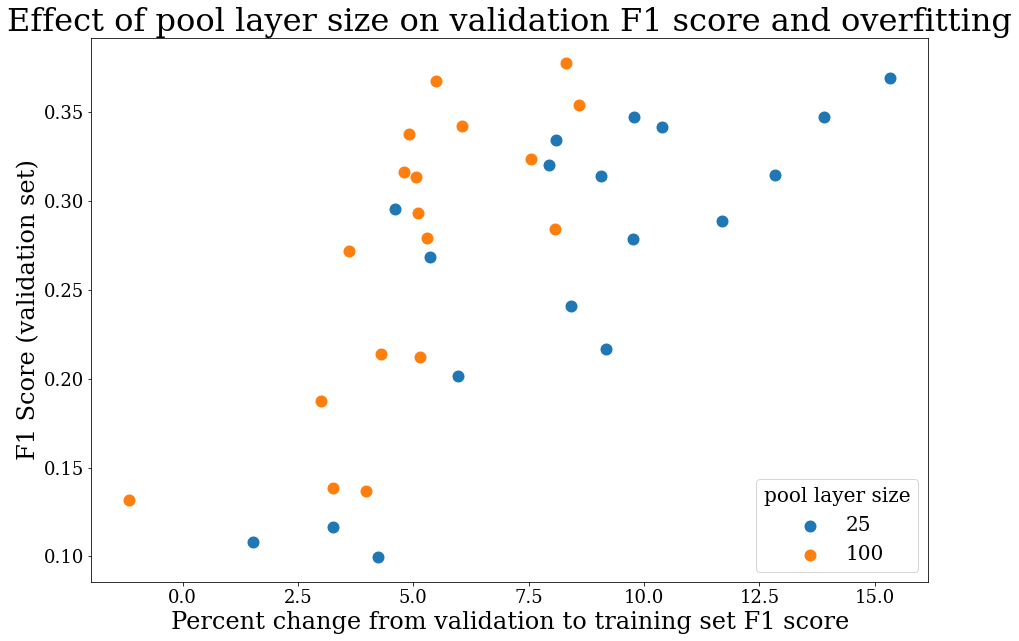

In [12]:
COLOR_VARIABLE = 'pool_size'

name = 'pool layer size'

plt.rc('font', family='serif')
plt.figure(figsize=(15, 10))

for group, grouped_df in sweep_df.groupby(COLOR_VARIABLE):
    train_f1 = grouped_df.train_f1_score.values
    val_f1 = grouped_df.validation_f1_score.values
    f1_pct_change = (train_f1 - val_f1) / val_f1

    val_f1_scores = grouped_df.validation_f1_score.values
#     plt.scatter(f1_pct_change.mean() * 100, val_f1_scores.mean(), linewidths=6, label=group)
    plt.scatter(f1_pct_change * 100, val_f1_scores, linewidths=6, label=group)

plt.title(f'Effect of {name} on validation F1 score and overfitting', fontsize=32)
plt.xlabel('Percent change from validation to training set F1 score', fontsize=24)
plt.ylabel('F1 Score (validation set)', fontsize=24)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=20, title=name, title_fontsize=20, loc=4)
plt.savefig(f'../figures/{COLOR_VARIABLE}_overfitting_vs_f1_PB20200624.pdf', format='pdf')

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 ]),
 <a list of 9 Text major ticklabel objects>)

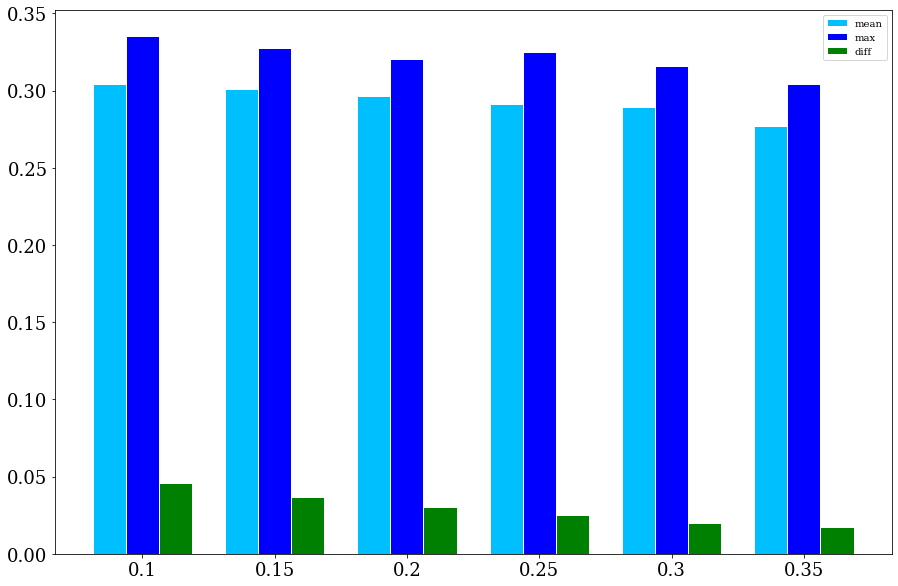

In [30]:
# Mean and max comparison
PARAM = 'drop'
max_val = sweep_df.groupby(PARAM).validation_f1_score.max()
mean_val = sweep_df.groupby(PARAM).validation_f1_score.mean()
diff = sweep_df.groupby(PARAM).train_f1_score.mean() - mean_val

bar_width = 0.25

x = {}
for i in range(3):
    x[i] = np.arange(len(mean_val)) + (i * bar_width)
    
plt.figure(figsize=(15, 10))

plt.bar(x[0], mean_val.values, width=bar_width, color='deepskyblue', label='mean', edgecolor='white')
plt.bar(x[1], max_val.values, width=bar_width, color='blue', label='max', edgecolor='white')
plt.bar(x[2], diff.values, width=bar_width, color='green', label='diff', edgecolor='white')


plt.xticks(x[1], mean_val.index)
plt.legend()

plt.title('', fontsize=32)
plt.xlabel('', fontsize=24)
plt.ylabel('', fontsize=24)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

In [11]:
cols = ['filters', 'pool_size', 'fully_connected', 'drop', 'loss_diff']

In [12]:
df = sweep_df[cols]

model = smf.ols(formula="loss_diff ~ C(filters) + C(pool_size) + C(fully_connected) + C(drop)",
                data=df)
res = model.fit()

In [13]:
print(res.pvalues)

Intercept                    1.737479e-85
C(filters)[T.(64, 8)]        5.388860e-17
C(filters)[T.(96, 32)]       6.823141e-02
C(filters)[T.(96, 8)]        3.482047e-14
C(pool_size)[T.5]            3.341554e-07
C(pool_size)[T.10]           6.118011e-14
C(fully_connected)[T.100]    9.372753e-01
C(fully_connected)[T.150]    6.010793e-01
C(drop)[T.0.2]               1.818438e-67
C(drop)[T.0.4]               1.914216e-81
dtype: float64


# Dummy Classifier baseline

In [42]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
import numpy as np

X = np.zeros(160000)
y = np.repeat(np.arange(16), 10000)
np.random.shuffle(y)

dummy = DummyClassifier(strategy='stratified')
dummy.fit(X, y)

y_pred = dummy.predict(X)

f1_score(y, y_pred, average='macro')

0.06280519503660897